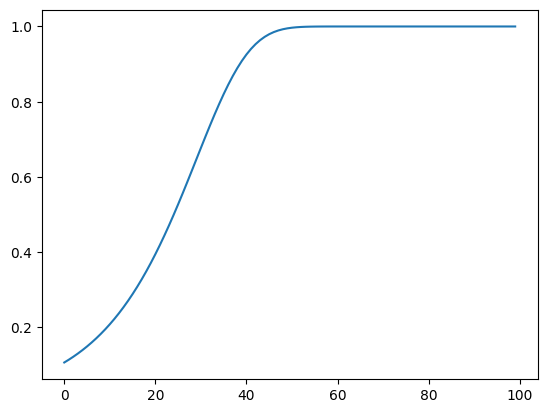

In [25]:
import numpy as np

import matplotlib.pyplot as plt

iters = 100


r = 1
r0 = 10

tau = (1/(3*r0))**(2/iters)

results = []
for i in range(iters):
    r0 *= tau
    results.append(np.tanh(r/r0))

plt.plot(results)






In [16]:
results[0]

0.09731188861075782

In [3]:
import pandas as pd


df = pd.read_csv('decay.csv')

In [10]:
lst_of_vals = df.values

In [11]:
lst_of_vals


array([['  [9.43185399e-02 1.43358511e-11]]'],
       [' [[1.43358511e-11 1.12276842e-01]'],
       ['  [1.12276842e-01 1.43358511e-11]]'],
       ...,
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [47]:
# open an npy file
data = np.load('fr_arr.npy')

avg_data = np.mean(data, axis=1)



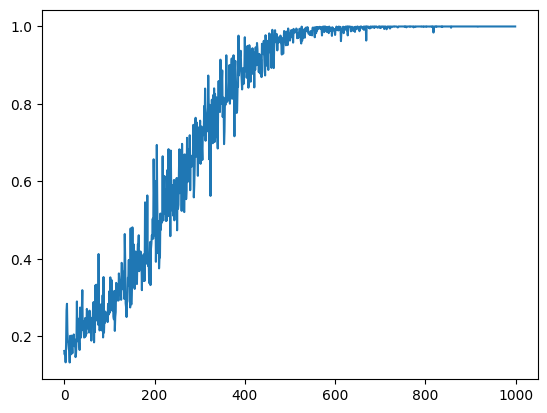

In [48]:
plt.plot(avg_data)

In [1]:
import jax
jax.config.update("jax_platform_name", "cpu")
jax.set_cpu_device_count(2)
jax.devices()

AttributeError: module 'jax' has no attribute 'set_cpu_device_count'

In [1]:
import os
import multiprocessing

os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count={}".format(
    multiprocessing.cpu_count()
)

import jax
jax.config.update('jax_platform_name', 'cpu')

platform = jax.lib.xla_bridge.get_backend().platform.casefold()
print("Platform: ", platform)
jax.devices()

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Platform:  metal


2024-04-24 15:30:06.064148: W pjrt_plugin/src/mps_client.cc:563] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


[METAL(id=0)]

In [6]:
import numpy as np

a = np.random.rand(10, 10, 10, 5)

#make it have the first shape be the product of the first two, but keep the rest the same
b = a.reshape(-1, *a.shape[2:])
print(b.shape)
 

(100, 10, 5)


In [9]:
import numpy as np

# Input data
X = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # (3, 2) shape, 3 samples, 2 features each

# First hidden layer
W1 = np.array([[0.5, -0.2], [0.3, 0.8]])  # (2, 2), 2 inputs to 2 hidden neurons
b1 = np.array([0.1, 0.2])
y1 = np.dot(X, W1) + b1
z1 = np.maximum(0, y1)  # Applying ReLU

# Second hidden layer (now becoming the previous output layer)
W2 = np.array([[0.1, -0.4], [0.6, 0.9]])  # (2, 2), from 2 hidden neurons to 2 outputs
b2 = np.array([0.2, 0.1])
y2 = np.dot(z1, W2) + b2
z2 = np.maximum(0, y2)  # Applying ReLU

# New final output layer with a single output
W3 = np.array([[0.3], [-0.1]])  # (2, 1), from 2 outputs to 1 final output
b3 = np.array([0.1])
y3 = np.dot(z2, W3) + b3  # (3, 1) shape

# Choose activation function based on the task
# For binary classification, apply Sigmoid
final_output = 1 / (1 + np.exp(-y3))  # Applying Sigmoid for binary output
print(final_output.shape)

(3, 1)


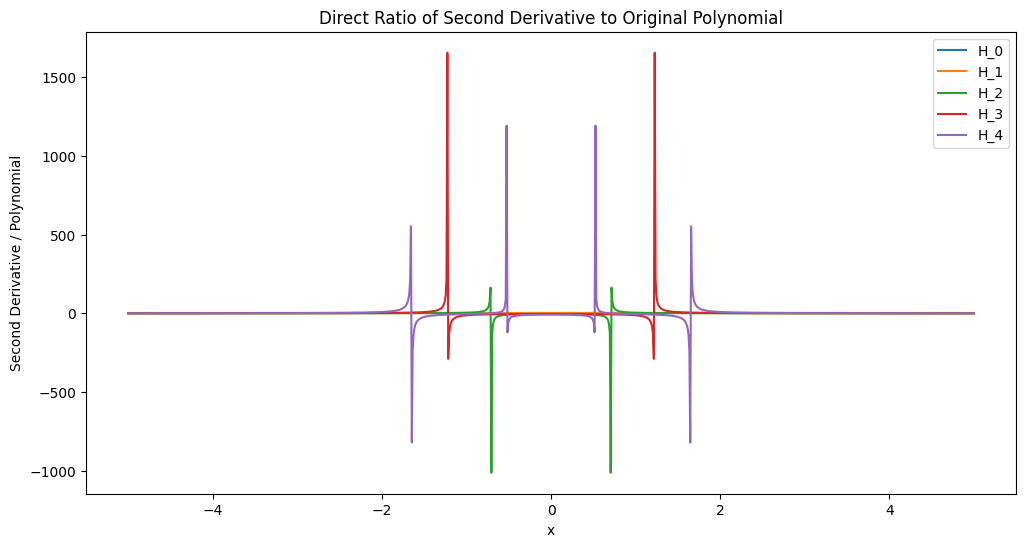

Max difference for H_0: 0.0
Max difference for H_1: 9767.932696475315
Max difference for H_2: 20416.648050477856
Max difference for H_3: 19741.628337899372
Max difference for H_4: 27301.40326521353


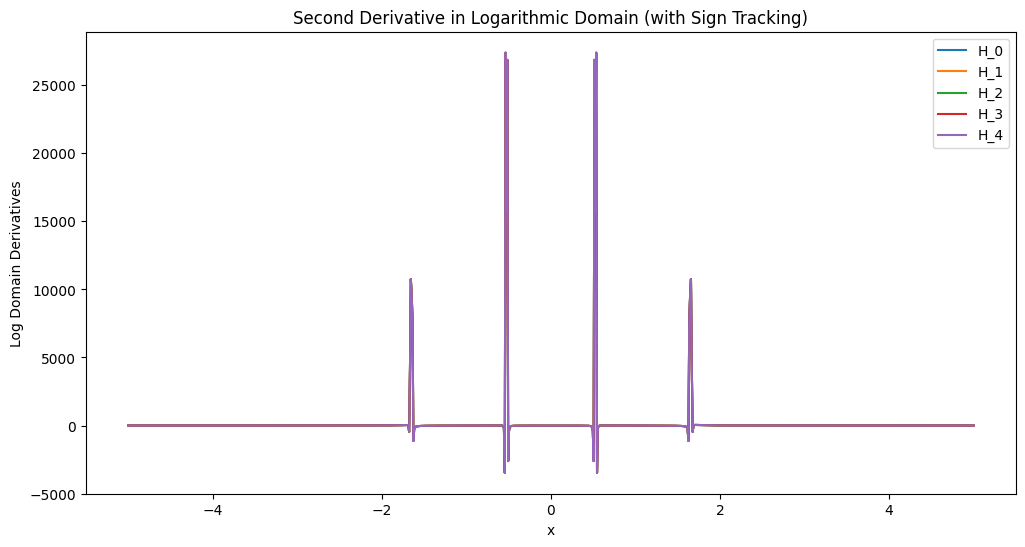

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

max_deg = 5
# Generate the first 5 Hermite polynomials
polys = {i: hermite(i) for i in range(max_deg)}

# Generate x values
x = np.linspace(-5, 5, 1000)

# Approach 1: Direct Ratio of Second Derivative to Polynomial
plt.figure(figsize=(12, 6))

for i in range(max_deg):
    # Original polynomial
    poly_values = polys[i](x)

    # Compute second derivative
    poly_deriv2 = polys[i].deriv(2)(x)

    # Ratio of second derivative to original polynomial
    direct_ratio = poly_deriv2 / poly_values  # Potential for singularities

    plt.plot(x, direct_ratio, label=f'H_{i}')

plt.legend()
plt.title("Direct Ratio of Second Derivative to Original Polynomial")
plt.xlabel("x")
plt.ylabel("Second Derivative / Polynomial")
plt.show()

# Approach 2: Second Derivative in the Logarithmic Domain
plt.figure(figsize=(12, 6))

for i in range(max_deg):
    # Logarithmic transformation
    poly_sign = np.sign(poly_values)
    log_poly = np.log(np.abs(poly_values)) #* poly_sign

    # Compute first and second derivatives in the log domain
    log_poly_deriv = np.gradient(log_poly, x)  # Gradient (akin to first derivative)
    log_poly_deriv2 = np.gradient(log_poly_deriv, x)  # Second gradient (akin to second derivative)

    # Expected relationship in the log domain
    log_ratios = log_poly_deriv2 + (log_poly_deriv ** 2)  # Expected behavior in logarithmic context

    plt.plot(x, log_ratios, label=f'H_{i}')

# calculate the difference between the two approaches

for i in range(max_deg):
    # Original polynomial
    poly_values = polys[i](x)

    # Compute second derivative
    poly_deriv2 = polys[i].deriv(2)(x)

    # Ratio of second derivative to original polynomial
    direct_ratio = poly_deriv2 / poly_values  # Potential for singularities

    # Logarithmic transformation
    poly_sign = np.sign(poly_values)
    log_poly = np.log(np.abs(poly_values)) #* poly_sign

    # Compute first and second derivatives in the log domain
    log_poly_deriv = np.gradient(log_poly, x)  # Gradient (akin to first derivative)
    log_poly_deriv2 = np.gradient(log_poly_deriv, x)  # Second gradient (akin to second derivative)

    # Expected relationship in the log domain
    log_ratios = log_poly_deriv2 + (log_poly_deriv ** 2)  # Expected behavior in logarithmic context

    # Calculate the difference
    diff = np.abs(direct_ratio - log_ratios)
    print(f"Max difference for H_{i}: {diff.max()}")

plt.legend()
plt.title("Second Derivative in Logarithmic Domain (with Sign Tracking)")
plt.xlabel("x")
plt.ylabel("Log Domain Derivatives")
plt.show()


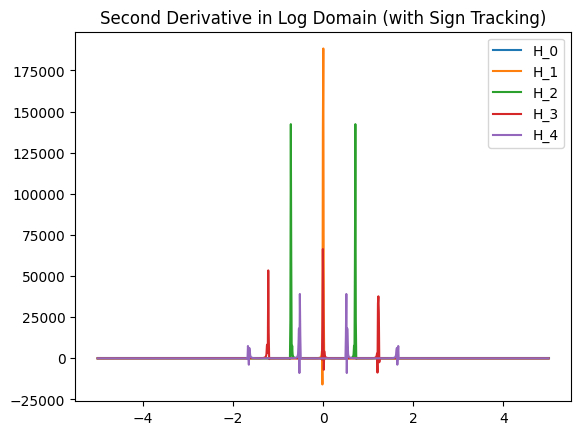

In [48]:
# Compute derivatives and handle signs
for i in range(5):
    poly_values = polys[i](x)
    
    # Logarithmic transformation
    poly_sign = np.sign(poly_values)
    log_poly = np.log(np.abs(poly_values)) * poly_sign
    
    # Derivatives in the log domain
    log_poly_deriv = np.gradient(log_poly, x)
    log_poly_deriv2 = np.gradient(log_poly_deriv, x)

    # Expected relationship in the log domain
    # The logarithmic derivative and its square
    log_ratios = log_poly_deriv2 + (log_poly_deriv ** 2)
    
    plt.plot(x, log_ratios, label=f'H_{i}')

plt.legend()
plt.title("Second Derivative in Log Domain (with Sign Tracking)")
plt.show()

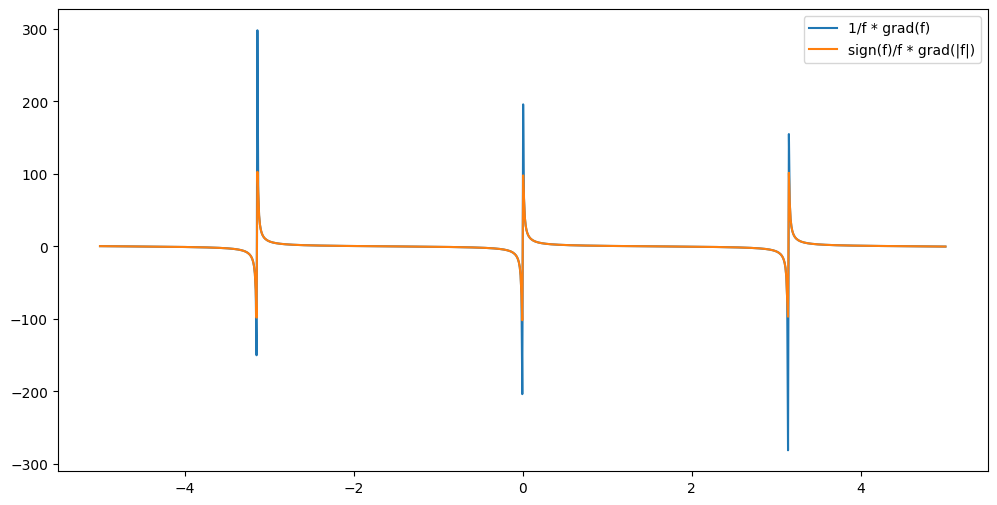

In [68]:
# question: is 1/f grad f the same as sign(f)/f grad(abs(f))?

import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-5, 5, 1000)
f = np.sin(x)

# Compute the gradient of the function
grad_f = np.gradient(f, x)

# Compute the gradient of the absolute value of the function
grad_abs_f = np.gradient(np.abs(f), x)
epsilon = 1e-4
one_over_f_grad_f = (1 / (f + epsilon)) * grad_f
one_over_f_grad_abs_f = (np.sign(f) / (f + epsilon)) * grad_abs_f

plt.figure(figsize=(12, 6))
plt.plot(x, one_over_f_grad_f, label="1/f * grad(f)")
plt.plot(x, one_over_f_grad_abs_f, label="sign(f)/f * grad(|f|)")

# points where sin(x) = 0
zero_points = np.where(f == 0)[0]
# plt them as vertical lines
for point in zero_points:
    plt.axvline(x[point], color='r', linestyle='--', alpha=0.5)

plt.legend()


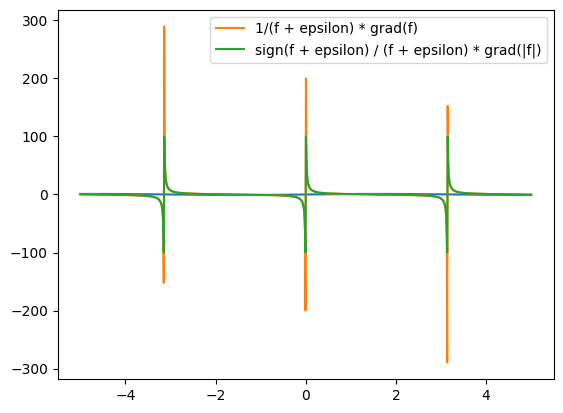

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-5, 5, 1000)
f = np.sin(x)

# plto the function
fig, ax = plt.subplots()
ax.plot(x, f)


# Compute the gradient of the function
grad_f = np.gradient(f, x)

# Compute the gradient of the absolute value of the function
grad_abs_f = np.gradient(np.abs(f), x)

# Adjust epsilon to a slightly larger value to avoid division issues
epsilon = 1e-10

# Revised expressions with added stability
one_over_f_grad_f = (1 / (f + epsilon)) * grad_f
one_over_f_grad_abs_f = (np.sign(f + epsilon) / (f + epsilon)) * grad_abs_f

# Plotting the results

plt.plot(x, one_over_f_grad_f, label="1/(f + epsilon) * grad(f)")
plt.plot(x, one_over_f_grad_abs_f, label="sign(f + epsilon) / (f + epsilon) * grad(|f|)")

# Mark points where sin(x) is approximately zero (singularities)
zero_points = np.where(np.abs(f) < epsilon)[0]

# Plot these singularity points as vertical lines
for point in zero_points:
    plt.axvline(x[point], color='r', linestyle='--', alpha=0.5)


# lim the axes
#plt.ylim(-10, 10)
plt.legend()
plt.show()


In [2]:
polys = {i: hermite(i) for i in range(max_deg)}


In [5]:
polys[0](10)


1.0

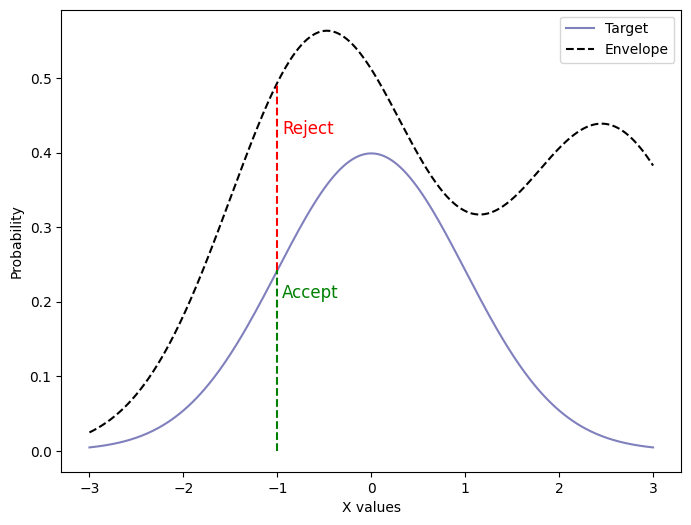

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values for the plot
x = np.linspace(-3, 3, 400)

# Define the Target distribution (e.g., a normal distribution)
def target_distribution(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def envelope_distribution(x):
    return   1.4*target_distribution(x+0.5) + 1.3*target_distribution(x - 2.5)/1.2


#mycolor rgb 
mycolor = (0.5, 0.5, 0.74)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, target_distribution(x), label='Target', color=mycolor)
plt.plot(x, envelope_distribution(x), linestyle='--', label='Envelope', color='black')

# Vertical lines for decision points
ct =0.2
plt.plot([-1, -1], [0.0, target_distribution(-1)], color="green", linestyle='--')
plt.plot([-1, -1], [target_distribution(-1), envelope_distribution(-1) ], color="red", linestyle='--')



# Annotating the decision points
plt.text(-0.4, 0.42, 'Reject', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=12)
plt.text(-0.35, 0.2, 'Accept', verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=12)

# Adding labels and legend
plt.xlabel('X values')
plt.ylabel('Probability')
#plt.title('Rejection Sampling Visualization')
plt.legend()

# Show the plot
plt.show()


Text(0, 0.5, 'X2')

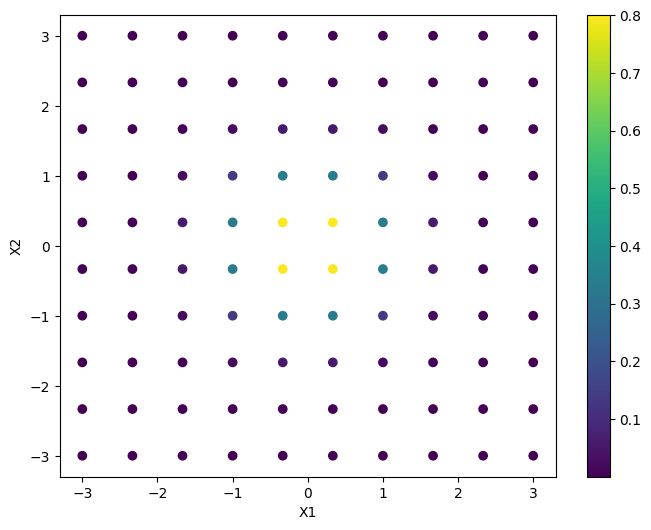

In [51]:
r1 = np.linspace(-3, 3, 10)
r2 = np.linspace(-3, 3, 10)

R1, R2 = np.meshgrid(r1, r2)
def psi(r):
    x1 = r[0]
    x2 = r[1]
    return np.exp(-x1**2 - x2**2)

# plot 
plt.figure(figsize=(8, 6))

Z = psi([R1, R2])


plt.colorbar(contour)

    


plt.xlabel('X1')
plt.ylabel('X2')
